In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter

In [2]:
r = 6

galaxy_title = 'NGC 4631'
galaxy_file = galaxy_title.replace(' ', '_')

line_name = '[OIII]'

line_measurement = 0
addendum = ''

if line_name == '[OIII]':
    line_measurement = 52
    addendum = 'sw_1'
    
if line_name == '[NIII]':
    line_measurement = 57
    addendum = 'sw_2'

titlename = galaxy_title + ' ' + line_name + ' ' + str(line_measurement) + ' ' + r'$\mu$m, r = {}'.format(str(r))
filename = galaxy_file + '_' + line_name + '_r={}'.format(str(r))

In [3]:
loaddir = '/Users/thepoetoftwilight/Documents/SOFIA_FIFI_Cycle-8/Data/' + galaxy_file + '_' + addendum + '/'

savedir = loaddir + 'r=' + str(r) + '/'

fits_name = galaxy_file + '_' + addendum + '.fits'
fits_spec_name = galaxy_file + '_' + addendum + '_r={}.fits'.format(str(r))

In [4]:
hdulist = fits.open(loaddir + fits_name)

hdulist.info()

Filename: /Users/thepoetoftwilight/Documents/SOFIA_FIFI_Cycle-8/Data/NGC_4631_sw_1/NGC_4631_sw_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     311   ()      
  1  FLUX          1 ImageHDU        28   (33, 35, 56)   float64   
  2  ERROR         1 ImageHDU        28   (33, 35, 56)   float64   
  3  UNCORRECTED_FLUX    1 ImageHDU        28   (33, 35, 56)   float64   
  4  UNCORRECTED_ERROR    1 ImageHDU        28   (33, 35, 56)   float64   
  5  WAVELENGTH    1 ImageHDU         7   (56,)   float64   
  6  X             1 ImageHDU         7   (33,)   float64   
  7  Y             1 ImageHDU         7   (35,)   float64   
  8  TRANSMISSION    1 ImageHDU         7   (56,)   float64   
  9  RESPONSE      1 ImageHDU         7   (56,)   float32   
 10  EXPOSURE_MAP    1 ImageHDU        28   (33, 35, 56)   int16   
 11  UNSMOOTHED_TRANSMISSION    1 ImageHDU         8   (1759, 2)   float32   


In [5]:
hdulist[1].header

XTENSION= 'IMAGE   '           /extension type                                  
BITPIX  =                  -64 /bits per data value                             
NAXIS   =                    3 /number of axes                                  
NAXIS1  =                   33 /                                                
NAXIS2  =                   35 /                                                
NAXIS3  =                   56 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                
EXTNAME = 'FLUX    '           /                                                
DATE-OBS= '2019-05-10T10:15:21' / Observation date                              
BUNIT   = 'Jy/pixel'           / Data units                                     
EQUINOX =              2000.00 / Coordinate equinox                             
CTYPE1  = 'RA---TAN'        

In [6]:
hdulist_spec = fits.open(savedir + fits_spec_name)
hdulist_spec.info()

Filename: /Users/thepoetoftwilight/Documents/SOFIA_FIFI_Cycle-8/Data/NGC_4631_sw_1/r=6/NGC_4631_sw_1_r=6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU      28   (56,)   float32   


In [7]:
wavelengths = hdulist[5].data

print(wavelengths)

wav_diff = []

for i in range(0, len(wavelengths)-1):
    wav_diff.append(wavelengths[i+1]-wavelengths[i])
  
wav_diff = np.average(wav_diff)

print(wav_diff)

[51.72389749 51.73110907 51.73832066 51.74553225 51.75274383 51.75995542
 51.76716701 51.77437859 51.78159018 51.78880177 51.79601335 51.80322494
 51.81043653 51.81764811 51.8248597  51.83207129 51.83928287 51.84649446
 51.85370605 51.86091763 51.86812922 51.87534081 51.88255239 51.88976398
 51.89697557 51.90418715 51.91139874 51.91861033 51.92582191 51.9330335
 51.94024509 51.94745667 51.95466826 51.96187985 51.96909143 51.97630302
 51.98351461 51.99072619 51.99793778 52.00514937 52.01236095 52.01957254
 52.02678413 52.03399572 52.0412073  52.04841889 52.05563048 52.06284206
 52.07005365 52.07726524 52.08447682 52.09168841 52.0989     52.10611158
 52.11332317 52.12053476]
0.007211586676262982


In [8]:
central_fluxes_unfiltered = hdulist_spec[0].data
    
central_fluxes_unfiltered = [flux*(10**(-26)) for flux in central_fluxes_unfiltered]

c = 3*10**8

for i in range(0, len(wavelengths)):
    
    wavelength = wavelengths[i]
    
    central_fluxes_unfiltered[i] = central_fluxes_unfiltered[i]*(c/(wavelength*10**(-6))**2)*(10**(-6))
    
central_fluxes_unfiltered = np.array(central_fluxes_unfiltered)

In [9]:
print(central_fluxes_unfiltered)

[ 0.00000000e+00  0.00000000e+00 -2.89227187e-14  1.85487346e-14
  1.55426788e-14 -2.47552285e-15  3.37634263e-15  2.02492876e-14
 -8.89065490e-15  4.09621918e-15  6.32410985e-15  1.41114026e-14
  3.50424127e-14  9.12106383e-15  2.57733141e-14  1.07698515e-14
  4.77900141e-15  6.82299299e-15  1.25927241e-14  1.75787871e-14
  1.75533522e-14  1.78978569e-14  1.97369506e-14  2.59030132e-14
  2.41539971e-14  2.65322241e-14  1.69934971e-14  1.54554143e-14
  1.11279458e-14  6.49033169e-15  1.63836320e-14  1.05705236e-14
  1.04889307e-14  6.57797922e-15  7.55622956e-15  1.87332134e-14
  7.51794137e-15  1.52337960e-14  1.25502123e-14  1.57454563e-14
  1.43696439e-14  1.34520574e-14  1.89872453e-14  9.16100864e-15
  4.21029983e-15  2.60340125e-15  2.39342601e-14  9.55004401e-15
  3.40049826e-14  2.87505741e-14  2.80773053e-14  2.16726581e-14
  1.44872981e-14  1.94058625e-14  0.00000000e+00  0.00000000e+00]


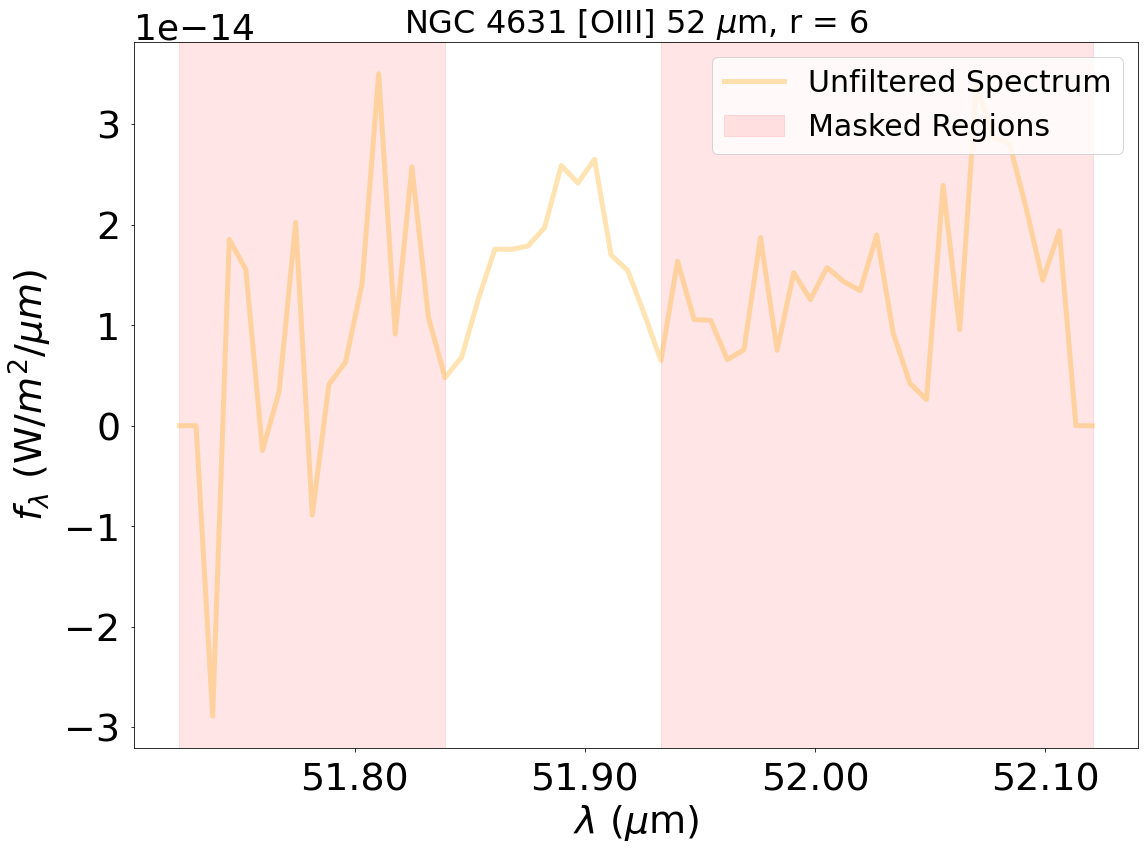

In [20]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths, central_fluxes_unfiltered, label = 'Unfiltered Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.axvspan(wavelengths[0], wavelengths[16], color = 'red', alpha = 0.1, label = 'Masked Regions')
ax.axvspan(wavelengths[-27], wavelengths[-1], color = 'red', alpha = 0.1)

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(titlename, fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

plt.savefig(savedir + filename + '-1-unfiltered_spectrum.png'.format(str(r)))

ax.legend(prop={'size': 30}, loc = 'upper right')

In [13]:
print(central_fluxes_unfiltered)

[ 0.00000000e+00  0.00000000e+00 -3.85605426e-14  2.66749114e-14
  2.57308735e-14 -3.08650105e-16  2.33399549e-16  6.91916956e-15
 -1.42469020e-15  6.15889627e-15  1.00576912e-14  1.51976860e-14
  4.34345386e-14  5.39486034e-14  4.06779805e-14  1.63004033e-14
  9.00189161e-15  1.31382592e-14  1.52748401e-14  1.98042241e-14
  1.94452411e-14  1.72758827e-14  2.08848378e-14  2.11361732e-14
  1.98387995e-14  2.48802284e-14  1.78883260e-14  1.62244830e-14
  1.07799117e-14  9.48348540e-15  1.78017286e-14  1.16926935e-14
  1.24070131e-14 -5.19884265e-16  4.83252694e-15  1.46296918e-14
  3.64805928e-15  1.28178109e-14  1.26139408e-14  1.88860407e-14
  1.42524939e-14  1.43699049e-14  1.93915323e-14  1.32676373e-14
  6.55215210e-15  8.73819799e-15  2.39473078e-14  4.97826198e-15
  2.22491623e-14  2.83145976e-14  2.01292277e-14  1.55797565e-14
  4.90065511e-15  1.08610080e-14  0.00000000e+00  0.00000000e+00]


In [24]:
central_fluxes_filtered = central_fluxes_unfiltered

wavelengths_filtered = wavelengths[16:-26]
central_fluxes_filtered = central_fluxes_filtered[16:-26]

print(central_fluxes_filtered)

[4.77900141e-15 6.82299299e-15 1.25927241e-14 1.75787871e-14
 1.75533522e-14 1.78978569e-14 1.97369506e-14 2.59030132e-14
 2.41539971e-14 2.65322241e-14 1.69934971e-14 1.54554143e-14
 1.11279458e-14 6.49033169e-15]


In [38]:
central_fluxes_filtered_continuum = []

left_cut = 51.845
right_cut = 51.93

for i in range(0, len(wavelengths_filtered)):
    
    wavelength = wavelengths_filtered[i]
    
    if(wavelength < left_cut or wavelength > right_cut):
        central_fluxes_filtered_continuum.append(central_fluxes_filtered[i])
    
    else:
        central_fluxes_filtered_continuum.append(float("Nan"))
        
central_fluxes_filtered_continuum = np.array(central_fluxes_filtered_continuum)

print(central_fluxes_filtered_continuum)

[4.77900141e-15            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan 6.49033169e-15]


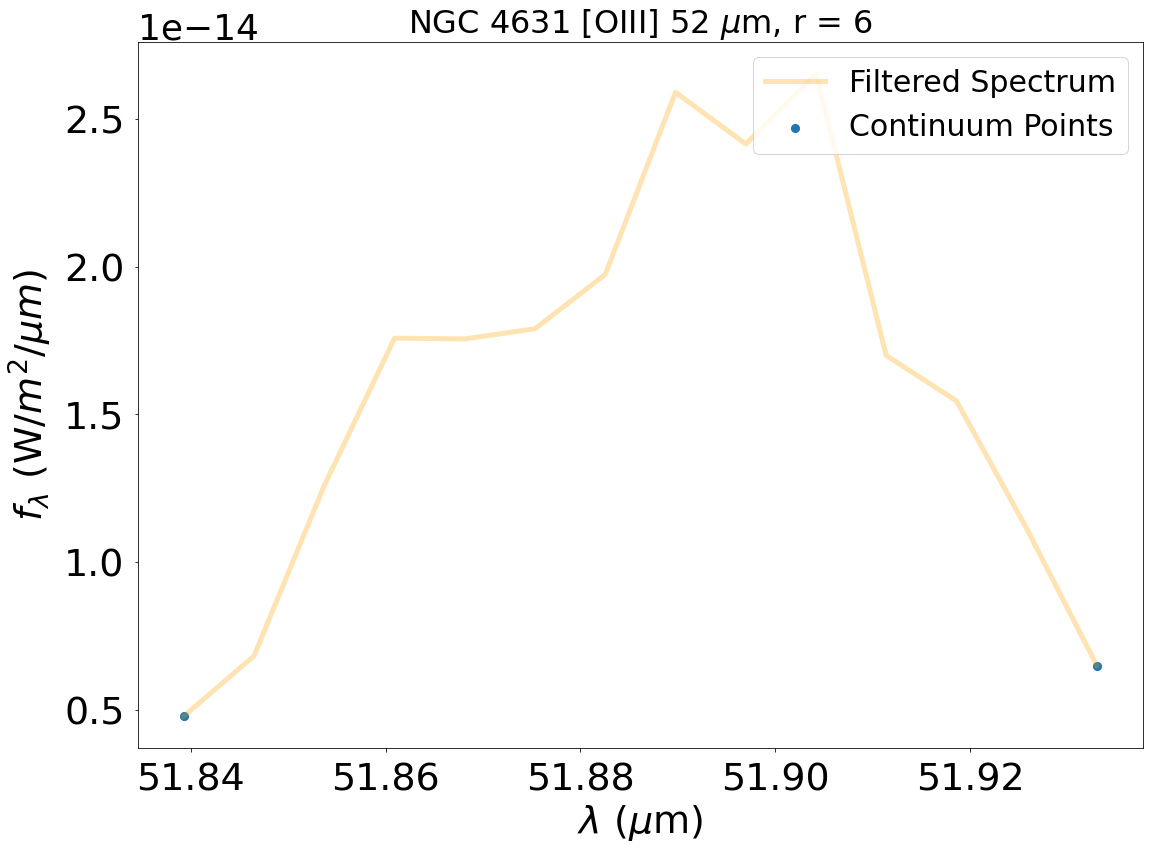

In [39]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Filtered Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(titlename, fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 30}, loc = 'upper right')

plt.savefig(savedir + filename + '-2-filtered_spectrum + continuum_points.png'.format(str(r)))

In [40]:
idcont = np.isfinite(central_fluxes_filtered_continuum)
cont_params = np.polyfit(wavelengths_filtered[idcont], central_fluxes_filtered_continuum[idcont], 1)

print(cont_params)

cont_line_filtered = cont_params[0]*wavelengths_filtered + cont_params[1]

[ 1.82540676e-14 -9.41498773e-13]


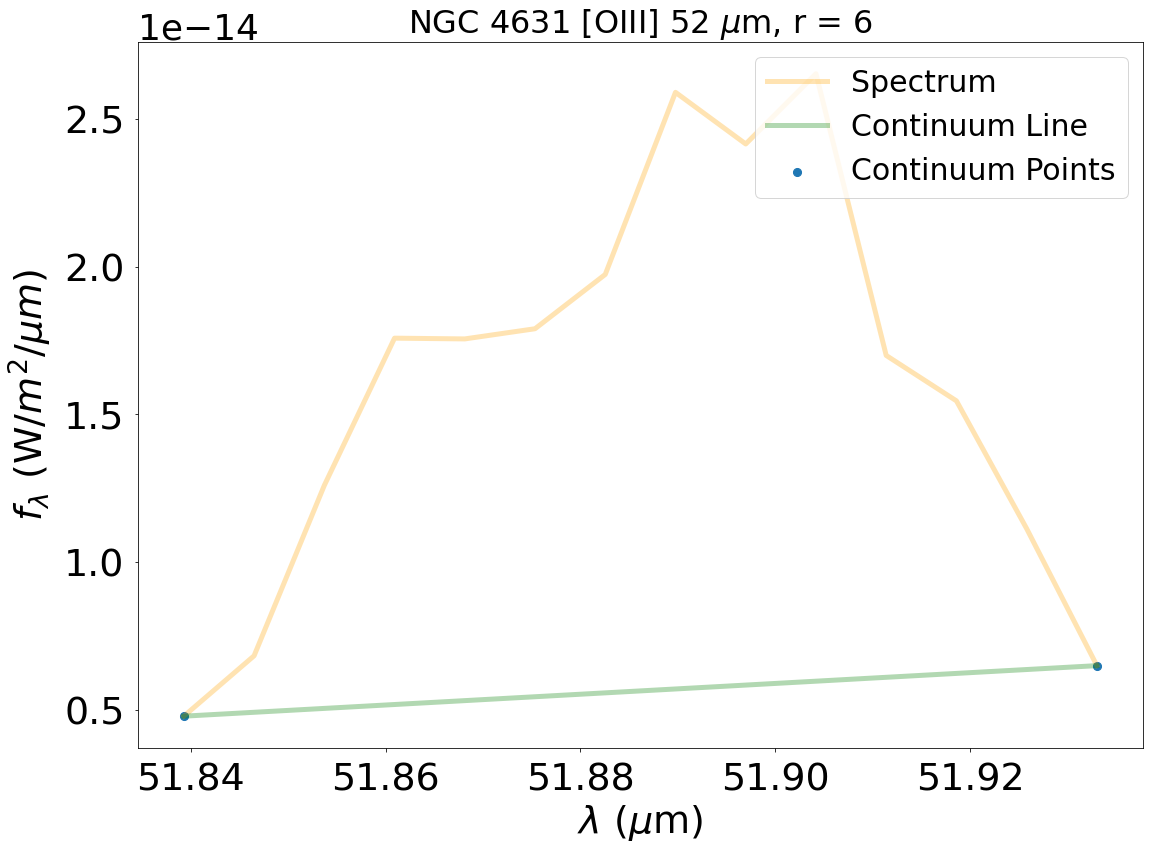

In [41]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.plot(wavelengths_filtered, cont_line_filtered, label = 'Continuum Line', lw = 5, color = 'green', alpha = 0.3)
ax.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(titlename, fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 30}, loc = 'upper right')

plt.savefig(savedir + filename + '-3-filtered_spectrum + continuum_line.png'.format(str(r)))

In [42]:
id_act = np.isnan(central_fluxes_filtered_continuum)

wavelengths_act = wavelengths_filtered[id_act]
central_fluxes_filtered_act = central_fluxes_filtered[id_act]
cont_line_filtered_act = cont_line_filtered[id_act]

central_fluxes_continuum_subtracted_act = central_fluxes_filtered_act - cont_line_filtered_act

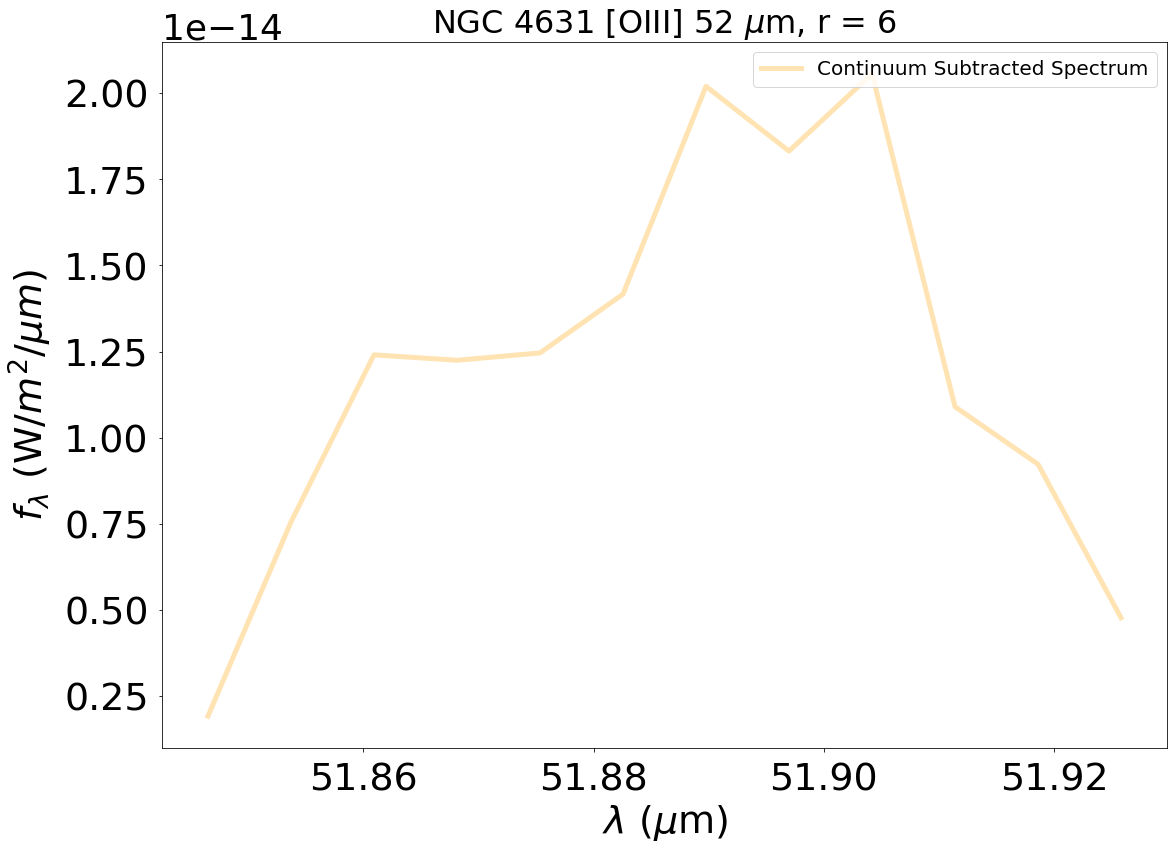

In [43]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths_act, central_fluxes_continuum_subtracted_act, label = 'Continuum Subtracted Spectrum', lw = 5, color = 'orange', alpha = 0.3)

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(titlename, fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 20}, loc = 'upper right')

plt.savefig(savedir + filename + '-4-continuum_subtracted_spectrum.png'.format(str(r)))

In [44]:
def fit_func_1(Z, peak_height, mu, sigma):
    
    P = peak_height*np.exp(-((Z-mu)**2/(2*sigma**2)))
    
    return P

In [45]:
heights = central_fluxes_continuum_subtracted_act/np.max(central_fluxes_continuum_subtracted_act)

centers = wavelengths_act

# Information about the peak in the numerical PDF
peak_ind = np.where(heights == np.max(heights))[0][0]
peak_height = np.max(heights)

# mu is where the numerical PDF peaks
mu = centers[peak_ind]

# Estimating sigma using FWHM
sigma = 0

for i in range(0, peak_ind):
    if(heights[i] >= peak_height/2):
        sigma = (mu - centers[i])/np.sqrt(2*np.log(2))
        break

# First fit a Gaussian

guess_params = np.array([peak_height, sigma])
fit_params, fit_covar = optimize.curve_fit(lambda centers, peak_height, sigma: 
                                           fit_func_1(centers, peak_height, mu, sigma), 
                                           centers, heights, p0=guess_params)

fit_params = [fit_params[0], mu, fit_params[1]]

fit_params[0] *= np.max(central_fluxes_continuum_subtracted_act)

print(fit_params)

[1.5632399871785865e-14, 51.90418715484428, 0.03905932174994572]


[5.25144198e-15 5.45204412e-15 5.65660021e-15 5.86498552e-15
 6.07706298e-15 6.29268315e-15 6.51168414e-15 6.73389163e-15
 6.95911885e-15 7.18716671e-15 7.41782389e-15 7.65086701e-15
 7.88606080e-15 8.12315844e-15 8.36190178e-15 8.60202170e-15
 8.84323854e-15 9.08526252e-15 9.32779421e-15 9.57052509e-15
 9.81313809e-15 1.00553083e-14 1.02967034e-14 1.05369847e-14
 1.07758077e-14 1.10128227e-14 1.12476760e-14 1.14800105e-14
 1.17094664e-14 1.19356825e-14 1.21582970e-14 1.23769481e-14
 1.25912755e-14 1.28009210e-14 1.30055297e-14 1.32047507e-14
 1.33982384e-14 1.35856534e-14 1.37666635e-14 1.39409444e-14
 1.41081812e-14 1.42680688e-14 1.44203133e-14 1.45646326e-14
 1.47007572e-14 1.48284313e-14 1.49474135e-14 1.50574775e-14
 1.51584129e-14 1.52500257e-14 1.53321392e-14 1.54045943e-14
 1.54672502e-14 1.55199848e-14 1.55626951e-14 1.55952973e-14
 1.56177275e-14 1.56299418e-14 1.56319161e-14 1.56236464e-14
 1.56051491e-14 1.55764606e-14 1.55376370e-14 1.54887545e-14
 1.54299087e-14 1.536121

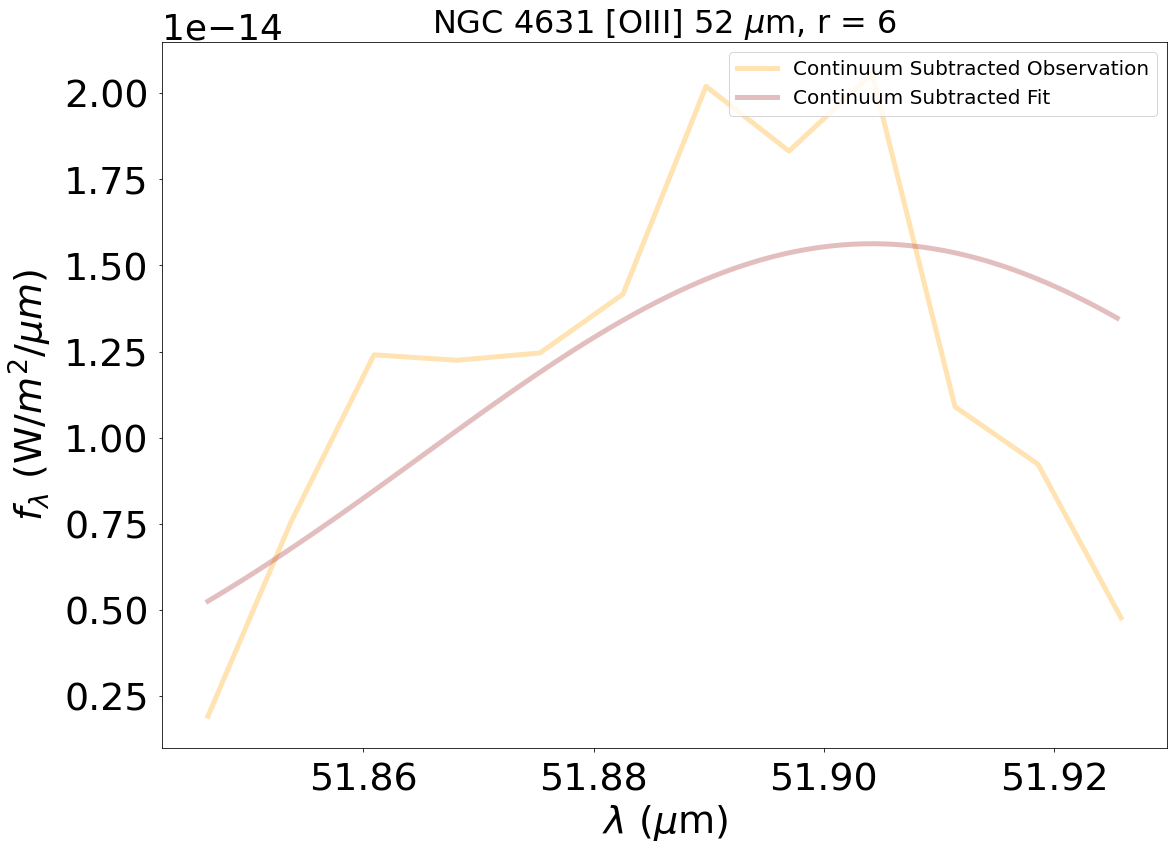

In [46]:
fig, ax = plt.subplots(figsize = (18, 13))

wavelength_range = np.arange(np.min(wavelengths_act), np.max(wavelengths_act), 0.001)

fitted_central_fluxes_continuum_subtracted_act = fit_func_1(wavelength_range, *fit_params)

print(fitted_central_fluxes_continuum_subtracted_act)

ax.plot(wavelengths_act, central_fluxes_continuum_subtracted_act, 
        label = 'Continuum Subtracted Observation', lw = 5, color = 'orange', alpha = 0.3)

ax.plot(wavelength_range, fitted_central_fluxes_continuum_subtracted_act, 
        label = 'Continuum Subtracted Fit', lw = 5, color = 'brown', alpha = 0.3)


ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(titlename, fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 20}, loc = 'upper right')

plt.savefig(savedir + filename + '-5-fit_continuum_subtracted_spectrum.png'.format(str(r)))

[5.25144198e-15 5.45204412e-15 5.65660021e-15 5.86498552e-15
 6.07706298e-15 6.29268315e-15 6.51168414e-15 6.73389163e-15
 6.95911885e-15 7.18716671e-15 7.41782389e-15 7.65086701e-15
 7.88606080e-15 8.12315844e-15 8.36190178e-15 8.60202170e-15
 8.84323854e-15 9.08526252e-15 9.32779421e-15 9.57052509e-15
 9.81313809e-15 1.00553083e-14 1.02967034e-14 1.05369847e-14
 1.07758077e-14 1.10128227e-14 1.12476760e-14 1.14800105e-14
 1.17094664e-14 1.19356825e-14 1.21582970e-14 1.23769481e-14
 1.25912755e-14 1.28009210e-14 1.30055297e-14 1.32047507e-14
 1.33982384e-14 1.35856534e-14 1.37666635e-14 1.39409444e-14
 1.41081812e-14 1.42680688e-14 1.44203133e-14 1.45646326e-14
 1.47007572e-14 1.48284313e-14 1.49474135e-14 1.50574775e-14
 1.51584129e-14 1.52500257e-14 1.53321392e-14 1.54045943e-14
 1.54672502e-14 1.55199848e-14 1.55626951e-14 1.55952973e-14
 1.56177275e-14 1.56299418e-14 1.56319161e-14 1.56236464e-14
 1.56051491e-14 1.55764606e-14 1.55376370e-14 1.54887545e-14
 1.54299087e-14 1.536121

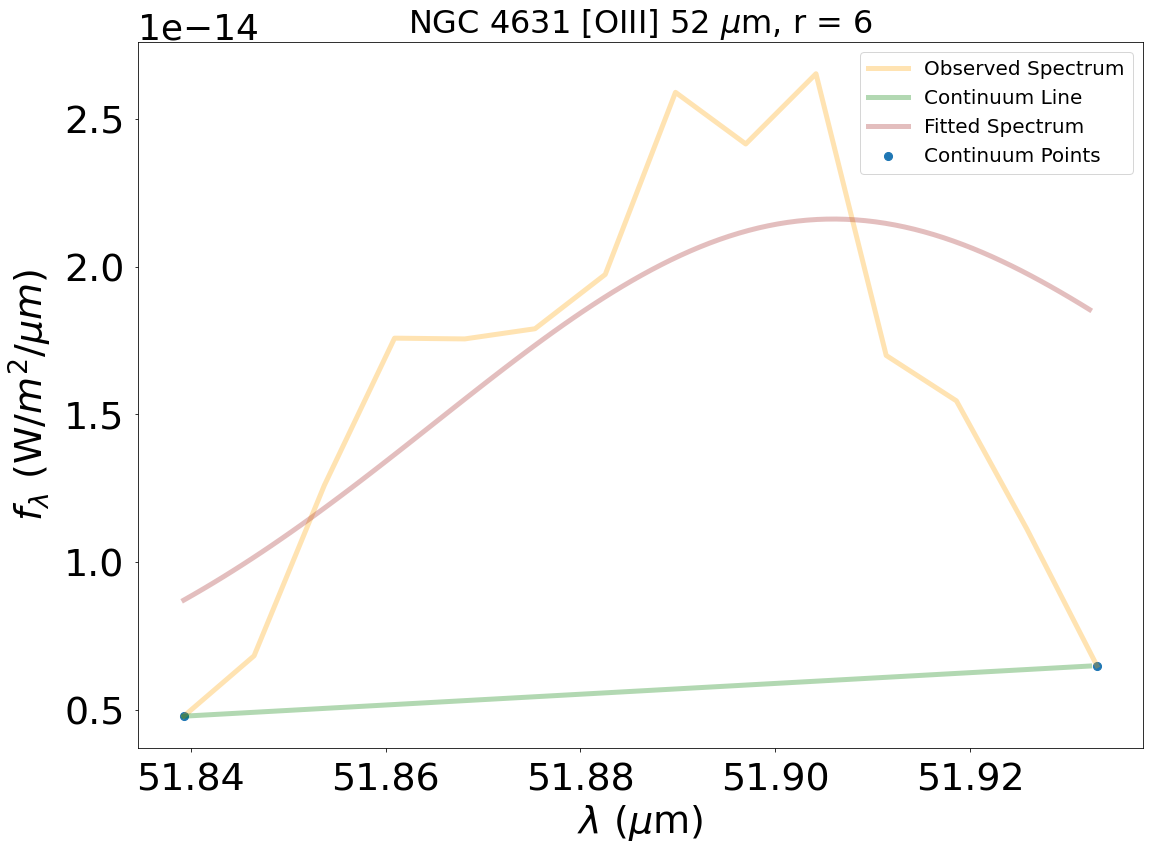

In [47]:
fig, ax = plt.subplots(figsize = (18, 13))

wavelength_range = np.arange(np.min(wavelengths_filtered), np.max(wavelengths_filtered), 0.001)
cont_line_filtered = cont_params[0]*wavelength_range + cont_params[1]

fitted_central_fluxes_act = fit_func_1(wavelength_range, *fit_params) + cont_line_filtered

print(fitted_central_fluxes_continuum_subtracted_act)

ax.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Observed Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.plot(wavelength_range, cont_line_filtered, label = 'Continuum Line', lw = 5, color = 'green', alpha = 0.3)
ax.plot(wavelength_range, fitted_central_fluxes_act, label = 'Fitted Spectrum', lw = 5, color = 'brown', alpha = 0.3)
ax.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(titlename, fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

ax.legend(prop={'size': 20}, loc = 'upper right')

plt.savefig(savedir + filename + '-6-final_spectrum.png'.format(str(r)))

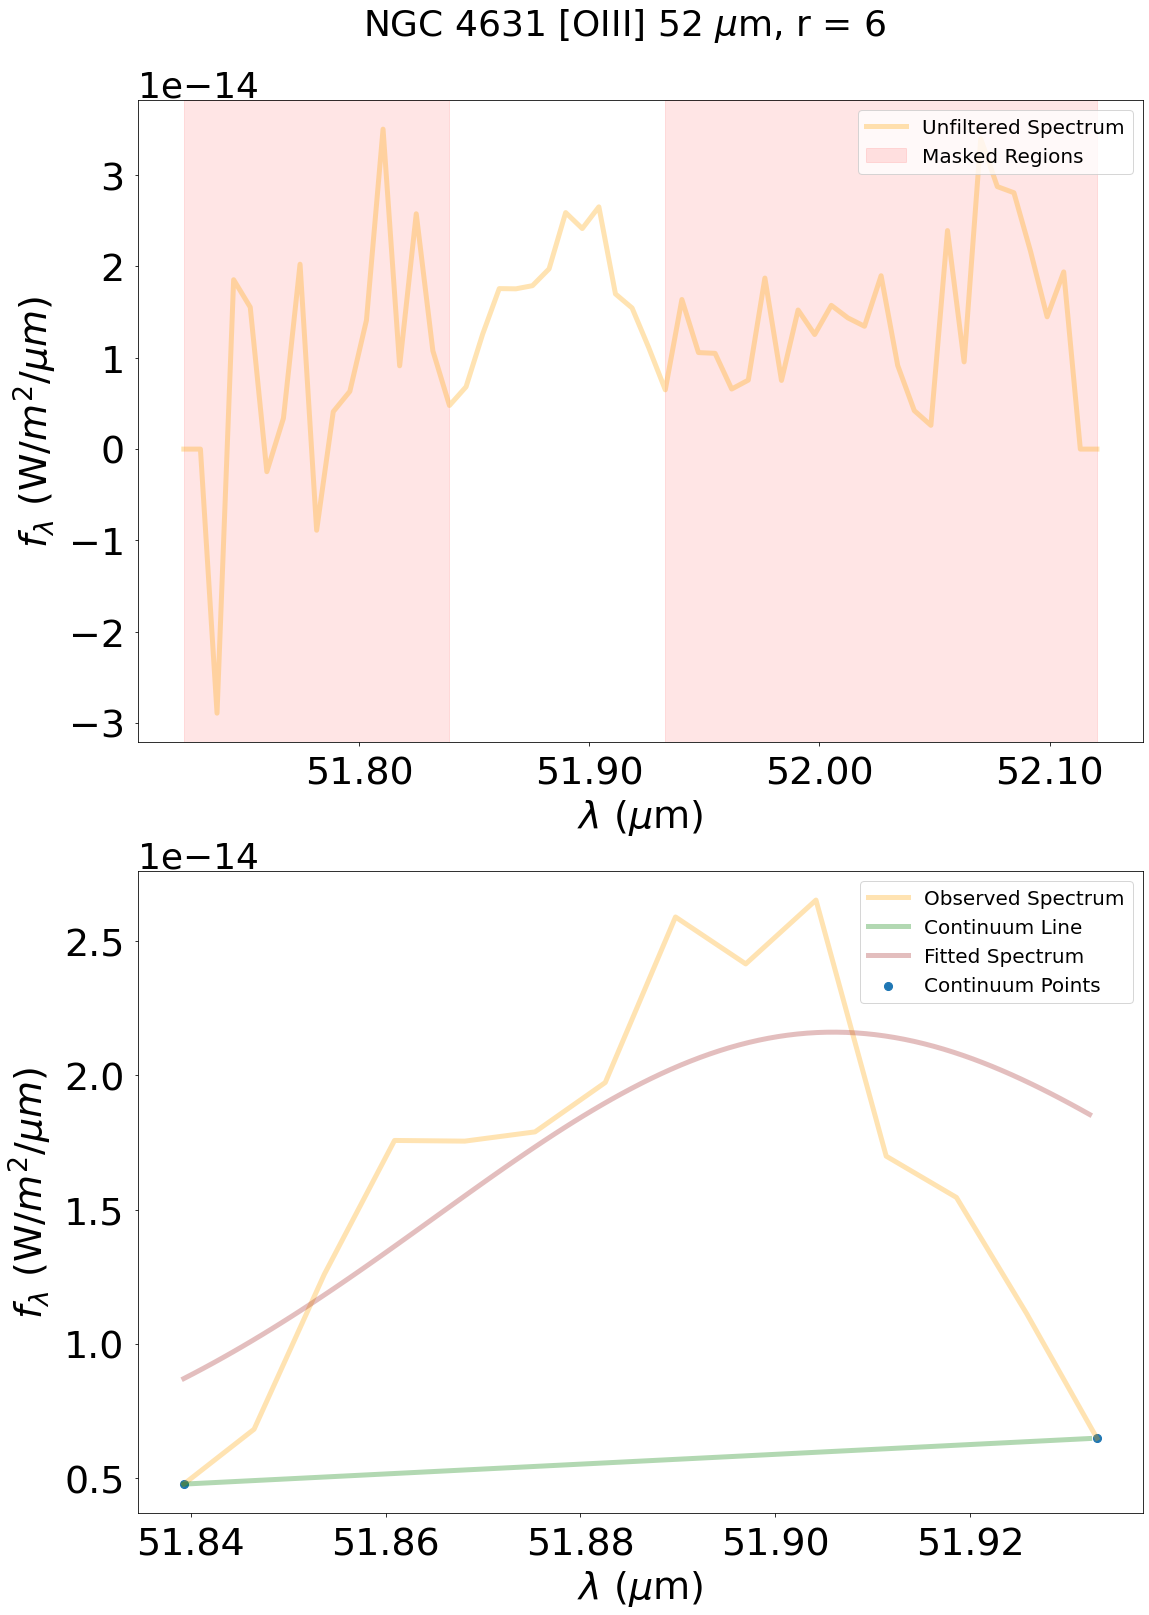

In [48]:
fig, axs = plt.subplots(2, 1, figsize = (18, 26))

ax1 = axs[0]

ax1.plot(wavelengths, central_fluxes_unfiltered, label = 'Unfiltered Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax1.axvspan(wavelengths[0], wavelengths[16], color = 'red', alpha = 0.1, label = 'Masked Regions')
ax1.axvspan(wavelengths[-27], wavelengths[-1], color = 'red', alpha = 0.1)

ax1.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax1.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.tick_params(labelsize = 38, pad = 10)
ax1.yaxis.offsetText.set_fontsize(36)
ax1.legend(prop={'size': 20}, loc = 'upper right')

ax2 = axs[1]

ax2.plot(wavelengths_filtered, central_fluxes_filtered, label = 'Observed Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax2.plot(wavelength_range, cont_line_filtered, label = 'Continuum Line', lw = 5, color = 'green', alpha = 0.3)
ax2.plot(wavelength_range, fitted_central_fluxes_act, label = 'Fitted Spectrum', lw = 5, color = 'brown', alpha = 0.3)
ax2.scatter(wavelengths_filtered, central_fluxes_filtered_continuum, s = 65, label = 'Continuum Points')

ax2.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax2.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax2.tick_params(labelsize = 38, pad = 10)
ax2.yaxis.offsetText.set_fontsize(36)
ax2.legend(prop={'size': 20}, loc = 'upper right')

fig.suptitle(titlename, fontsize = 36, y = 0.93)

plt.savefig(savedir + filename + '-7-summary_spectrum.png'.format(str(r)))

In [49]:
flux_continuum = np.trapz(cont_line_filtered, x = wavelength_range, dx = wav_diff)

flux_obs = np.trapz(central_fluxes_filtered, x = wavelengths_filtered, dx = wav_diff)
flux_obs_sub = flux_obs - flux_continuum

flux_fit = np.trapz(fitted_central_fluxes_act, x = wavelength_range, dx = wav_diff)
flux_fit_sub = flux_fit - flux_continuum

In [50]:
f = open(savedir + filename + "_measurements.txt".format(str(r)), "w")
f.write('Flux of the continuum = ' + str(flux_continuum) + ' W/m^2 \n')
f.write('Flux of the continuum subtracted observation = ' + str(flux_obs_sub) + ' W/m^2 \n')
f.write('Flux of the continuum subtracted fit = ' + str(flux_fit_sub) + ' W/m^2 \n')
f.write('FWHM of fitted Gaussian = ' + str(str(2*np.sqrt(np.log(2))*fit_params[2])) + r' microns')
f.close()